### Toby Adjuik
adjuiktoby@gmail.com

Department of Biosystems and Agricultural Engineering

University of Kentucky

January 30, 2022


### Download packages needed for the simulation

In [61]:
import pandas as pd
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# allow plots to appear in the notebook
%matplotlib inline

### Data Cleaning and Preprocessing

In [62]:
#Making dataframe from CSV file
GHG_data=pd.read_csv(r"D:\Data\Measured_GHG_Fluxes_ML.csv")
GHG_data.shape


(126520, 8)

For this study, we were only interested in bionergy related cropping systems. 

In [63]:
#Number of values in column "Crop"
GHG_data['Crop'].value_counts()

Zea mays (Corn)                                               79392
Glycine max (Soybean)                                         11224
Hordeum vulgare (Barley)                                       6156
Medicago sativa (Alfalfa)                                      6121
Panicum virgatum (Switchgrass)                                 2832
                                                               2588
Sorghum vulgare sudanense (Sudangrass)                         2252
Fallow                                                         2243
Andropogon gerardii (Big Bluestem)                             1868
Pasture                                                        1756
Rangeland                                                      1608
Triticum aestivum (Spring Wheat)                               1272
None                                                           1203
Pisum sativum (Pea)                                            1098
Restored Prairie                                

In [64]:
#Replace empty cells with in the predictor "crop" with "Nan"
GHG_data['Crop'].replace(' ', np.nan, inplace=True)

In [65]:
#Replace empty cells with in the predictor "Soil Classification" with "Nan"
GHG_data['Soil Classification'].replace(' ', np.nan, inplace=True)

In [66]:
#Now drop all cells with "Nan"
GHG_data.dropna(subset=['Crop','Soil Classification'], inplace=True)
GHG_data.shape

(80806, 8)

In [67]:
#Check for empty cells in all predictors
GHG_data.isnull().sum()

Objectid               0
Crop                   0
Air_Temp_DEGC          0
Soil_Temp_DEGC         0
Soil_Moisture          0
Fert_Ammend_Class      0
Soil Classification    0
CO2 (g C/ha/y)         0
dtype: int64

After replacing empty cells with "Nans", all "Nans" were dropped and the updated dataframe was saved as a CSV file and stored

In [ ]:
#Saving the dataframe
GHG_data
New_GHG_Data.to_csv("New_GHG_Data.csv")

In [68]:
#Reading the updated CSV file back into the notebook
New_GHG_Data=pd.read_csv(r"D:\Data\New_GHG_Data.csv")
New_GHG_Data.shape

(11683, 10)

In [69]:
#Number of values in column "Crop"
New_GHG_Data['Crop'].value_counts()

Corn                  3792
Pasture               1756
Fallow                1464
Alfalfa                986
Spring_Wheat           706
Switch_grass           703
Reed_Canary_Grass      691
Soybean                687
Pea_Barley_mixture     445
Rangeland              252
Miscanthus             148
Rye                     53
Name: Crop, dtype: int64

In [70]:
# Since we were only interested in bioenergy crops compared to pasture and fallow, we dropped some crops leaving only corn,
# pasture, fallow, switch grass and miscanthus

indexNames = New_GHG_Data[New_GHG_Data['Crop'] == 'Alfalfa'].index

# Delete these row indexes from dataFrame
New_GHG_Data.drop(indexNames , inplace=True)

indexNames = New_GHG_Data[New_GHG_Data['Crop'] == 'Spring_Wheat'].index
New_GHG_Data.drop(indexNames , inplace=True)

indexNames = New_GHG_Data[New_GHG_Data['Crop'] == 'Reed_Canary_Grass'].index
New_GHG_Data.drop(indexNames , inplace=True)

indexNames = New_GHG_Data[New_GHG_Data['Crop'] == 'Soybean'].index
New_GHG_Data.drop(indexNames , inplace=True)

indexNames = New_GHG_Data[New_GHG_Data['Crop'] == 'Pea_Barley_mixture'].index
New_GHG_Data.drop(indexNames , inplace=True)

indexNames = New_GHG_Data[New_GHG_Data['Crop'] == 'Rangeland'].index
New_GHG_Data.drop(indexNames , inplace=True)

indexNames = New_GHG_Data[New_GHG_Data['Crop'] == 'Rye'].index
New_GHG_Data.drop(indexNames , inplace=True)


New_GHG_Data.shape

(7863, 10)

In [71]:
#Number of values remaining in rows with column "Crop"
New_GHG_Data['Crop'].value_counts()

Corn            3792
Pasture         1756
Fallow          1464
Switch_grass     703
Miscanthus       148
Name: Crop, dtype: int64

In [72]:
#Convert class "crop" into categorical variables.
New_GHG_Data.Crop = pd.Categorical(New_GHG_Data.Crop).codes
New_GHG_Data['Crop'].value_counts()

0    3792
3    1756
1    1464
4     703
2     148
Name: Crop, dtype: int64

In [73]:
#Number of values in column "Soil Classification"
New_GHG_Data['Soil_Classification'].value_counts()

Fine_mixed_semiactive_mesic Typic Hapludalfs                                                     2594
Fine silty_mixed_ active_mesic Typic Paleudalfs                                                  1689
Coarse silty_mixed_mesic Durixerollic Calciorthods                                               1069
fine loamy_mixed_superactive_mesic Aridic Haplustalfs                                            1010
frigid Typic Argiustoll                                                                           592
fine loamy_mixed_superactive_mesic Ustic Haplocambids                                             456
Tomek fine_smectitic_mesic Pachic Argiudolls_Filbert fine_smectitic_mesic  Vertic Argialbolls     290
Clayey_illitic_mesic Typic Hapludults                                                             110
Fine silty_mixed_superactive_frigid Typic and Pachic Haplustolls                                   53
Name: Soil_Classification, dtype: int64

In [74]:
#Convert class "crop" into categorical variables.
New_GHG_Data.Soil_Classification = pd.Categorical(New_GHG_Data.Soil_Classification).codes
New_GHG_Data['Soil_Classification'].value_counts()

4    2594
2    1689
1    1069
6    1010
8     592
7     456
5     290
0     110
3      53
Name: Soil_Classification, dtype: int64

In [75]:
#Number of values in column "Fert_Ammend_Class"
New_GHG_Data['Fert_Ammend_Class'].value_counts()

Synthetic                                            3728
None                                                 2710
Organic                                              1267
Integrated (Combination of organic and synthetic)     158
Name: Fert_Ammend_Class, dtype: int64

In [76]:
#Convert textural class into categorical variables.
New_GHG_Data.Fert_Ammend_Class = pd.Categorical(New_GHG_Data.Fert_Ammend_Class).codes
New_GHG_Data['Fert_Ammend_Class'].value_counts()

3    3728
1    2710
2    1267
0     158
Name: Fert_Ammend_Class, dtype: int64

In [77]:
New_GHG_Data.head(5)

,Crop,Soil_Classification,Objectid,Nitrous,Carbon_dioxide,Methane,Air_Temp_DEGC,Soil_Temp_DEGC,Soil_Moisture,Fert_Ammend_Class
0,0,6,46481,0.861897,632.193026,0.363508,0.0,0.0,0.0,3
1,0,6,46482,0.828018,648.737378,0.328282,0.0,0.0,0.0,3
2,0,6,46483,0.794139,665.281730,0.293056,0.0,0.0,0.0,3
3,0,6,46484,0.760259,681.826082,0.257829,0.0,0.0,0.0,3
4,0,6,46485,0.726380,698.370433,0.222603,0.0,0.0,0.0,3


### Feature Selection

### Pearson Correlation Matrix

In [78]:
New_GHG_Data=New_GHG_Data.loc[:,['Air_Temp_DEGC','Soil_Temp_DEGC','Soil_Moisture','Crop','Fert_Ammend_Class','Soil_Classification','Carbon_dioxide']]
New_GHG_Data.shape 

(7863, 7)

In [29]:
#Statistical significance denoted in asterisks:

from scipy.stats import pearsonr
import numpy as np

rho = New_GHG_Data.corr()
pval = New_GHG_Data.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p



,Air_Temp_DEGC,Soil_Temp_DEGC,Soil_Moisture,Crop,Fert_Ammend_Class,Soil_Classification,Carbon_dioxide
Air_Temp_DEGC,1.0***,0.7***,0.31***,-0.15***,0.11***,-0.2***,0.46***
Soil_Temp_DEGC,0.7***,1.0***,0.27***,-0.11***,0.24***,0.25***,0.49***
Soil_Moisture,0.31***,0.27***,1.0***,-0.03***,0.18***,0.16***,0.09***
Crop,-0.15***,-0.11***,-0.03***,1.0***,-0.18***,0.22***,-0.36***
Fert_Ammend_Class,0.11***,0.24***,0.18***,-0.18***,1.0***,-0.05***,0.3***
Soil_Classification,-0.2***,0.25***,0.16***,0.22***,-0.05***,1.0***,-0.22***
Carbon_dioxide,0.46***,0.49***,0.09***,-0.36***,0.3***,-0.22***,1.0***


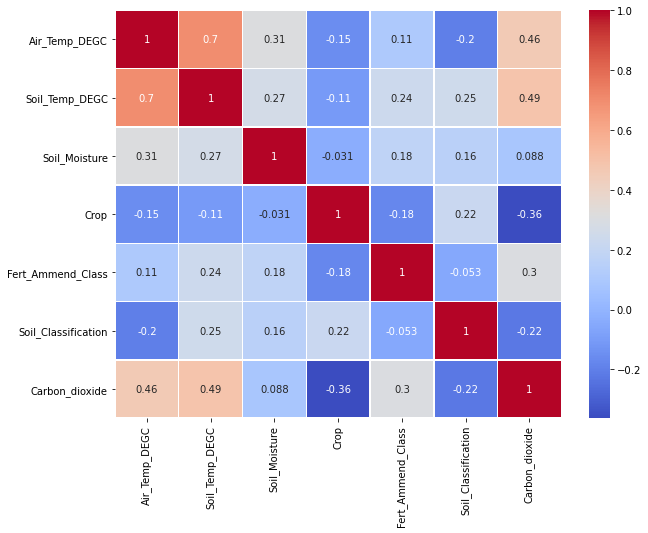

In [30]:
# Visualize Heatmap of the Dataset
# Create and save Heatmap
from matplotlib import pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10,7.5))
ax = sns.heatmap(New_GHG_Data.corr(method = "pearson"), annot=True, cmap='coolwarm', linewidth=0.5)
plt.show()


### Rescaling x

In [31]:
# Create Datasets for Target and Predictors
X = pd.DataFrame(np.c_[New_GHG_Data['Air_Temp_DEGC'],New_GHG_Data['Soil_Temp_DEGC'], New_GHG_Data['Soil_Moisture'],New_GHG_Data['Soil_Classification'],New_GHG_Data['Crop'],New_GHG_Data['Fert_Ammend_Class']], columns = ['Air_Temp_DEGC','Soil_Temp_DEGC','Soil_Moisture','Soil_Classification','Crop','Fert_Ammend_Class'])
y = New_GHG_Data['Carbon_dioxide'] # Create dataset with CO2 flux

### Train/Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
print("The shape of the X_trainset is",X_train.shape) # The shape of the X_trainset
print("The shape of the y_trainset is", y_train.shape) # The shape of the y_trainset

print("The shape of the X_testset is", X_test.shape) # The shape of the X_testset
print("The shape of the y_testset is", y_test.shape) # The shape of the y_testset


The shape of the X_trainset is (6290, 6)
The shape of the y_trainset is (6290,)
The shape of the X_testset is (1573, 6)
The shape of the y_testset is (1573,)


### step forward feature selection

In [34]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

### Remove correlated features

In [35]:
# find and remove correlated features
from scipy.stats import pearsonr

def correlation(X, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [151]:
from sklearn.ensemble import GradientBoostingRegressor
sfs = SFS(GradientBoostingRegressor(n_estimators=100, max_depth= 10,learning_rate= 0.1,alpha=0.99,max_leaf_nodes=70), 
           k_features=6, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=10)

sfs = sfs.fit(np.array(X_train), y_train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   14.8s finished

[2021-11-24 22:26:36] Features: 1/6 -- score: 0.632189313753822[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.1s finished

[2021-11-24 22:26:51] Features: 2/6 -- score: 0.7303728969365002[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   19.9s finished

[2021-11-24 22:27:11] Features: 3/6 -- score: 0.761087011393489[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 ou

In [149]:
# indices of the selected columns
sfs.k_feature_idx_

(0, 1, 3, 4, 5)

In [150]:

#sfs1.k_feature_names_
X_train.columns[list(sfs.k_feature_idx_)]
#sfs1.k_feature_names_     # to get the final set of features

Index(['Air_Temp_DEGC', 'Soil_Temp_DEGC', 'Soil_Classification', 'Crop',
       'Fert_Ammend_Class'],
      dtype='object')

### Calculation of VFI
calculation of variance inflation factor

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

In [38]:
  #Get variable/feature names
feature=list(X.columns)
feature

['Air_Temp_DEGC',
 'Soil_Temp_DEGC',
 'Soil_Moisture',
 'Soil_Classification',
 'Crop',
 'Fert_Ammend_Class']

In [39]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


In [40]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

               feature       VIF
0        Air_Temp_DEGC  3.043046
1       Soil_Temp_DEGC  3.087523
2        Soil_Moisture  1.627950
3  Soil_Classification  4.102037
4                 Crop  1.829971
5    Fert_Ammend_Class  3.138906


### Random Forest Regression

In [41]:
# Create Datasets for Target and Predictors
 X = pd.DataFrame(np.c_[New_GHG_Data['Air_Temp_DEGC'],New_GHG_Data['Soil_Temp_DEGC'],New_GHG_Data['Soil_Classification'],New_GHG_Data['Crop'],New_GHG_Data['Fert_Ammend_Class']], columns = ['Air_Temp_DEGC','Soil_Temp_DEGC','Soil_Classification','Crop','Fert_Ammend_Class'])
y = New_GHG_Data['Carbon_dioxide'] # Create dataset with CO2 flux

In [42]:

#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [43]:
#Reshape y values
y=y.values.reshape(-1,1)

### Split data and save train and test data

In [44]:
from sklearn.model_selection import train_test_split
#Saving missing data into csv file

#split the data into train and test set
train,test = train_test_split(New_GHG_Data, test_size=0.20, random_state=0)
#save the data
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
print("The shape of the X_trainset is",X_train.shape) # The shape of the X_trainset
print("The shape of the y_trainset is", y_train.shape) # The shape of the y_trainset

print("The shape of the X_testset is", X_test.shape) # The shape of the X_testset
print("The shape of the y_testset is", y_test.shape) # The shape of the y_testset


The shape of the X_trainset is (6290, 5)
The shape of the y_trainset is (6290, 1)
The shape of the X_testset is (1573, 5)
The shape of the y_testset is (1573, 1)


In [46]:
y.shape

(7863, 1)

In [487]:
#Hyperparameter search
#Random Forest

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [40,60,80,100],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [15,20,30,50],
    'min_samples_leaf':[1,2,4,8],
}
clf = RandomForestRegressor(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='r2')
grid.fit(X_train, y_train.ravel())
print(grid.best_params_)
print("R2:"+ str(grid.best_score_))

{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 80}
R2:0.7673082786555985


In [47]:
#Fit model
clf = RandomForestRegressor(n_estimators=80, criterion='mae', max_depth=30, min_samples_split=4, min_samples_leaf=2,
min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
bootstrap=False, oob_score=False, n_jobs=-1, random_state=10, verbose=0, warm_start=False)

#Fit model to training set
clf.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=False, criterion='mae', max_depth=30,
                      max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=80, n_jobs=-1,
                      random_state=10)

In [49]:
#Predict using model with trainset
y_train_RF = clf.predict(X_train)
#y_train_RF 
y_train_RF.shape

(6290,)

In [51]:
# Predicting the test set results
y_pred_RF = clf.predict(X_test)
y_pred_RF.shape

(1573,)

### Evaluation Metrics for Random Forest Model

In [36]:
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics


# Random Forest
#Train set
score =r2_score(y_train, y_train_RF)
print("Train accuracy (R2) for random forest regression: {}".format(score))

#Test set
score_R2_RF =r2_score(y_test, y_pred_RF)
print("Test accuracy (R2) for random forest regression: {}".format(score_R2_RF))  

#Random Forest Regression
#train
score = mean_absolute_error(y_train, y_train_RF)
print("Train accuracy(MAE) for random forest regression: {}".format(score))

#test
score_MAE_RF = mean_absolute_error(y_test, y_pred_RF)
print("Test accuracy(MAE) for random forest regression: {}".format(score_MAE_RF))


#Train set
score = np.sqrt(metrics.mean_squared_error(y_train, y_train_RF))
print("Train accuracy (RMSE) for RF: {}".format(score))

#Test set
score_RMSE_RF =np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))
print("Test accuracy (RMSE) for RF: {}".format(score_RMSE_RF))


Train accuracy (R2) for random forest regression: 0.8713597160256423
Test accuracy (R2) for random forest regression: 0.8217935253903287
Train accuracy(MAE) for random forest regression: 1968.0664345506818
Test accuracy(MAE) for random forest regression: 2543.577856509373
Train accuracy (RMSE) for RF: 4696.756747423454
Test accuracy (RMSE) for RF: 5893.723453202229


In [37]:
Metric =  " MAE = " + str(round(score_MAE_RF, 3))+ "(g C ha$^{-1}$day$^{-1}$)" + "\n"+ " R$^2$ = " + str(round(score_R2_RF, 2))+ "," + " RMSE = "+ str(round(score_RMSE_RF, 3))+"(g C ha$^{-1}$day$^{-1}$)"
print("Random Forest Model Performance: ", Metric)
                                                     

Random Forest Model Performance:   MAE = 2543.578(g C ha$^{-1}$day$^{-1}$)
 R$^2$ = 0.82, RMSE = 5893.723(g C ha$^{-1}$day$^{-1}$)


In [38]:
y_pred_RF= y_pred_RF.reshape(-1, 1)

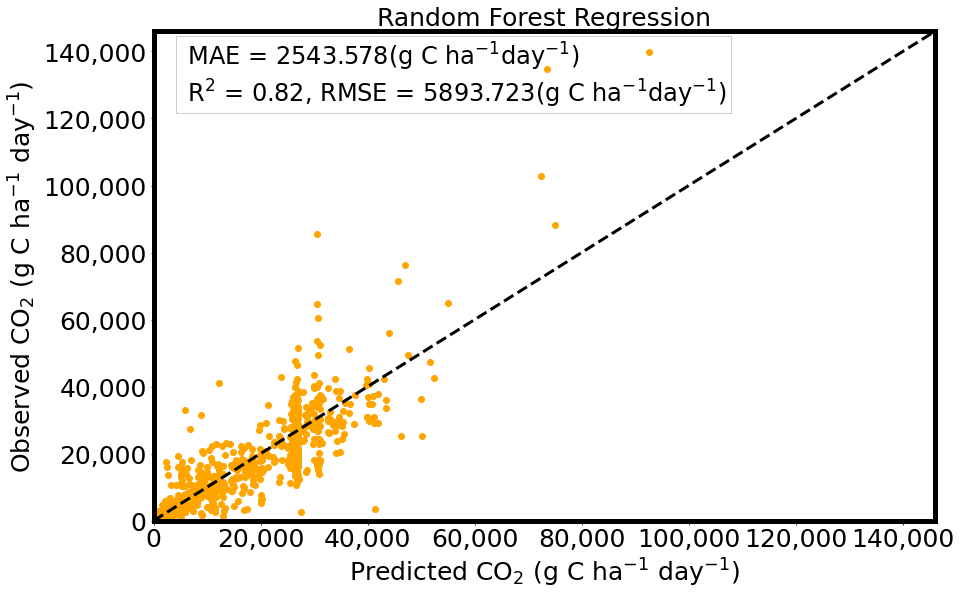

In [40]:
#Plotting the Random Forest Model

%matplotlib inline
# Create Regression Plot for Test and Prediction values
import matplotlib.pyplot as plt 
from pylab import *
import matplotlib as mpl


#Plot for multi linear regression
from scipy.optimize import curve_fit
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, y_pred_RF, y_test, cv=10)

fig, ax = plt.subplots(figsize=(14, 9))
ax.set_title('Random Forest Regression', fontsize=25)
ax.scatter(predicted,y_test,c="orange")
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Predicted CO$_2$ (g C ha$^{-1}$ day$^{-1}$)',fontsize=25)
ax.set_ylabel('Observed CO$_2$ (g C ha$^{-1}$ day$^{-1}$)',fontsize=25)
plt.xlim(0, 146000)
plt.ylim(0, 146000)


ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.tick_params(axis='both', which='major', labelsize=25)
plt.text(5000,125000, Metric,fontsize=24, bbox=dict(facecolor='none', alpha=0.2))
rc('axes', linewidth=1)
plt.show()

### Feature Importance for Random Forest Model

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
#from pyplot import plt.


In [62]:
# Create Datasets for Target and Predictors
X = pd.DataFrame(np.c_[New_GHG_Data['Air_Temp_DEGC'],New_GHG_Data['Soil_Temp_DEGC'],New_GHG_Data['Soil_Classification'],New_GHG_Data['Crop'],New_GHG_Data['Fert_Ammend_Class']], columns = ['Air_Temp_DEGC','Soil_Temp_DEGC','Soil_Classification','Crop','Fert_Ammend_Class'])
y = New_GHG_Data['Carbon_dioxide'] # Create dataset with CO2 flux

### Split data into training and testing

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
print("The shape of the X_trainset is",X_train.shape) # The shape of the X_trainset
print("The shape of the y_trainset is", y_train.shape) # The shape of the y_trainset

print("The shape of the X_testset is", X_test.shape) # The shape of the X_testset
print("The shape of the y_testset is", y_test.shape) # The shape of the y_testset

The shape of the X_trainset is (6290, 5)
The shape of the y_trainset is (6290,)
The shape of the X_testset is (1573, 5)
The shape of the y_testset is (1573,)


In [64]:
#Fitting the model
clf = RandomForestRegressor(n_estimators=80, criterion='mae', max_depth=30, min_samples_split=4, min_samples_leaf=2,
min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
bootstrap=False, oob_score=False, n_jobs=-1, random_state=10, verbose=0, warm_start=False)

#Fit model to training set
clf.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=False, criterion='mae', max_depth=30,
                      max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=80, n_jobs=-1,
                      random_state=10)

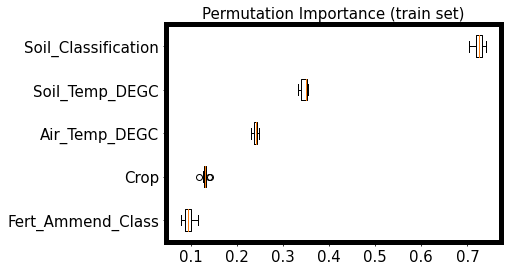

In [420]:
#Computing the Permutation Importance for the training dataset
result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()
#plt.subplot(1, 2, 1)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X.columns)[sorted_idx])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title("Permutation Importance (train set)",fontsize=15)
fig.tight_layout()
plt.show()


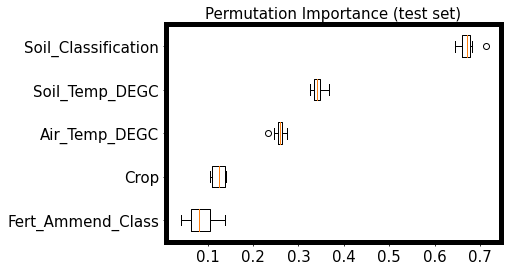

In [421]:
#Computing the Permutation Importance for the testing dataset
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
#plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X.columns)[sorted_idx])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title("Permutation Importance (test set)",fontsize=15)
fig.tight_layout()
plt.show()

### K- Nearest Neighbor Model

In [52]:
# Create Datasets for Target and Predictors
X = pd.DataFrame(np.c_[New_GHG_Data['Air_Temp_DEGC'],New_GHG_Data['Soil_Temp_DEGC'],New_GHG_Data['Soil_Classification'],New_GHG_Data['Crop'],New_GHG_Data['Fert_Ammend_Class']], columns = ['Air_Temp_DEGC','Soil_Temp_DEGC','Soil_Classification','Crop','Fert_Ammend_Class'])
y = New_GHG_Data['Carbon_dioxide'] # Create dataset with CO2 flux

In [54]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [55]:
#Reshape y values
y=y.values.reshape(-1,1)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
print("The shape of the X_trainset is",X_train.shape) # The shape of the X_trainset
print("The shape of the y_trainset is", y_train.shape) # The shape of the y_trainset

print("The shape of the X_testset is", X_test.shape) # The shape of the X_testset
print("The shape of the y_testset is", y_test.shape) # The shape of the y_testset


The shape of the X_trainset is (6290, 5)
The shape of the y_trainset is (6290, 1)
The shape of the X_testset is (1573, 5)
The shape of the y_testset is (1573, 1)


In [69]:
#Hyperparameter Tuning Using GridSearchCV
from sklearn.model_selection import GridSearchCV
KNN_params = {
    'n_neighbors': list(range(1, 10))
}
clf = KNeighborsRegressor()
grid = GridSearchCV(clf, KNN_params, cv=10, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'n_neighbors': 9}
MSE:45050750.6680498


In [46]:
#Model fitting
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=8, weights='uniform', algorithm='auto', leaf_size=1, p=2, metric='manhattan', metric_params=None, n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=1, metric='manhattan', n_jobs=-1, n_neighbors=8)

In [47]:
#Predicting on trainset
y_train_KNN = knn.predict(X_train)

In [48]:
# Predicting the testset 
y_pred_KNN = knn.predict(X_test)
#print(y_pred_MLR)
y_pred_KNN.shape
#y_pred_MLR

(1573, 1)

In [50]:
#Evaluation Metrics for KNN Model
from sklearn.metrics import mean_squared_error
#Metrics

#KNN Regression
#Train set
score = r2_score(y_train, y_train_KNN)
print("Train accuracy (R2) for KNN regression: {}".format(score))

#Test set
score_R2_KNN = r2_score(y_test, y_pred_KNN)
print("Test accuracy (R2) for KNN regression: {}".format(score_R2_KNN))    
    
#KNN Regression
#Train set
score = mean_absolute_error(y_train, y_train_KNN)
print("Train accuracy (MAE) for KNN regression: {}".format(score))

#Test set
score_MAE_KNN = mean_absolute_error(y_test, y_pred_KNN)
print("Test accuracy (MAE) for KNN regression: {}".format(score_MAE_KNN)) 

#Train set
score = np.sqrt(metrics.mean_squared_error(y_train, y_train_KNN))
print("Train accuracy (RMSE) for KNN: {}".format(score))

#Test set
score_RMSE_KNN =np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN))
print("Test accuracy (RMSE) for KNN: {}".format(score_RMSE_KNN))

Train accuracy (R2) for KNN regression: 0.7962644344009804
Test accuracy (R2) for KNN regression: 0.7687223188113541
Train accuracy (MAE) for KNN regression: 2679.0321965839908
Test accuracy (MAE) for KNN regression: 2867.712857124865
Train accuracy (RMSE) for KNN: 5910.755534548617
Test accuracy (RMSE) for KNN: 6714.209322645898


In [51]:
Metric =  " MAE = " + str(round(score_MAE_KNN, 3)) +"(g C ha$^{-1}$day$^{-1}$)"+ "\n"+ " R$^2$ = " + str(round(score_R2_KNN, 2))+ "," + " RMSE = "+ str(round(score_RMSE_KNN, 3))+"(g C ha$^{-1}$day$^{-1}$)"
print("KNN Model Performance: ", Metric)

KNN Model Performance:   MAE = 2867.713(g C ha$^{-1}$day$^{-1}$)
 R$^2$ = 0.77, RMSE = 6714.209(g C ha$^{-1}$day$^{-1}$)


In [52]:
y_pred_KNN= y_pred_KNN.reshape(-1, 1)

### Create 1:1 scatter plot of measured values against predicted values

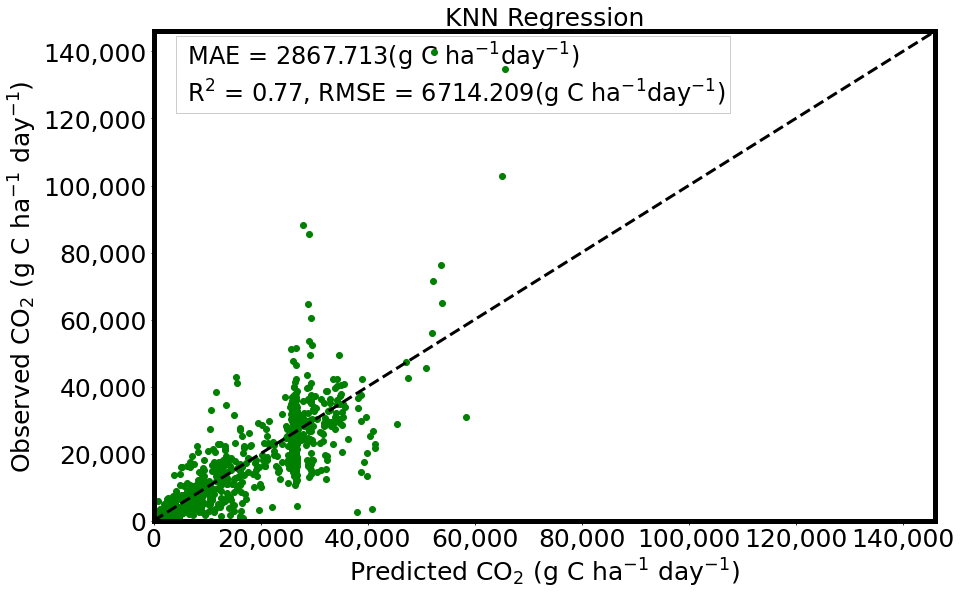

In [54]:

import matplotlib.pyplot as plt 
from pylab import *


#Plot for multi linear regression
from scipy.optimize import curve_fit
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, y_pred_KNN, y_test, cv=10)

fig, ax = plt.subplots(figsize=(14, 9))
ax.set_title('KNN Regression', fontsize=25)
ax.scatter(predicted,y_test,c="green")
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Predicted CO$_2$ (g C ha$^{-1}$ day$^{-1}$)',fontsize=25)
ax.set_ylabel('Observed CO$_2$ (g C ha$^{-1}$ day$^{-1}$)',fontsize=25)
plt.xlim(0, 146000)
plt.ylim(0, 146000)


ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.tick_params(axis='both', which='major', labelsize=25)
plt.text(5000,125000, Metric,fontsize=24, bbox=dict(facecolor='none', alpha=0.2))
rc('axes', linewidth=1)
plt.show()

### Support Vector Regression

In [55]:
# Create Datasets for Target and Predictors
X = pd.DataFrame(np.c_[New_GHG_Data['Air_Temp_DEGC'],New_GHG_Data['Soil_Temp_DEGC'],New_GHG_Data['Soil_Classification'],New_GHG_Data['Crop'],New_GHG_Data['Fert_Ammend_Class']], columns = ['Air_Temp_DEGC','Soil_Temp_DEGC','Soil_Classification','Crop','Fert_Ammend_Class'])
y = New_GHG_Data['Carbon_dioxide'] # Create dataset with CO2 flux

In [56]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [57]:
#Reshape y values
y=y.values.reshape(-1,1)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
print("The shape of the X_trainset is",X_train.shape) # The shape of the X_trainset
print("The shape of the y_trainset is", y_train.shape) # The shape of the y_trainset

print("The shape of the X_testset is", X_test.shape) # The shape of the X_testset
print("The shape of the y_testset is", y_test.shape) # The shape of the y_testset

The shape of the X_trainset is (6290, 5)
The shape of the y_trainset is (6290, 1)
The shape of the X_testset is (1573, 5)
The shape of the y_testset is (1573, 1)


In [335]:
#SVM
#Hyperparameter tuning with Grid search
from sklearn.svm import SVC,SVR
from sklearn.model_selection import GridSearchCV

SVR_params = {
   # 'C': [100,150,200,250,300],
   # "kernel":['rbf','linear','sigmoid'],
    "epsilon":[0.01],
    "gamma":[0.01,0.02,0.03,0.04,0.05,0.06]
}
clf = SVR(gamma='scale')
grid = GridSearchCV(clf, SVR_params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train.ravel())
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))


{'epsilon': 0.01, 'gamma': 0.01}
MSE:7.680894651974476e-05


In [60]:
from sklearn.svm import SVR

# training using 'training data'
sv_reg = SVR(kernel='rbf', degree=3, gamma=1.2, coef0=0.0, tol=0.001, C=4000, epsilon=0.001, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
sv_reg.fit(X_train, y_train.ravel()) # fit the model for training data

SVR(C=4000, epsilon=0.001, gamma=1.2)

In [61]:
#Predict trainset
y_train_SVR = sv_reg.predict(X_train)
y_train_SVR 
y_train_SVR.shape

(6290,)

In [62]:
# Predicting the test set results
y_pred_SVR = sv_reg.predict(X_test)
y_pred_SVR.shap

(1573,)

In [64]:
 from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics

#Metrics

#SVR

#Train set
score = r2_score(y_train, y_train_SVR)
print("Train accuracy (R2) for SVR: {}".format(score))

#Test set
score_R2_SVR = r2_score(y_test, y_pred_SVR)
print("Test accuracy (R2) for SVR: {}".format(score_R2_SVR))    
    

#Train set
score = mean_absolute_error(y_train, y_train_SVR)
print("Train accuracy (MAE) for SVR: {}".format(score))

#Test set
score_MAE_SVR = mean_absolute_error(y_test, y_pred_SVR)
print("Test accuracy (MAE) for SVR: {}".format(score_MAE_SVR))  

#Train set
score = np.sqrt(metrics.mean_squared_error(y_train, y_train_SVR))
print("Train accuracy (RMSE) for SVR: {}".format(score))

#Test set
score_RMSE_SVR =np.sqrt(metrics.mean_squared_error(y_test, y_pred_SVR))
print("Test accuracy (RMSE) for SVR: {}".format(score_RMSE_SVR))
    

Train accuracy (R2) for SVR: 0.7375346641443179
Test accuracy (R2) for SVR: 0.7059288063109057
Train accuracy (MAE) for SVR: 2923.6893938372045
Test accuracy (MAE) for SVR: 2992.086599930659
Train accuracy (RMSE) for SVR: 6708.810885637068
Test accuracy (RMSE) for SVR: 7571.017616767961


In [65]:
Metric =  " MAE = " + str(round(score_MAE_SVR, 2)) +"(g C ha$^{-1}$day$^{-1}$)"+ "\n"+ " R$^2$ = " + str(round(score_R2_SVR, 2))+ "," + " RMSE = "+ str(round(score_RMSE_SVR, 2))+"(g C ha$^{-1}$day$^{-1}$)"
print("SVR Model Performance: ", Metric)

SVR Model Performance:   MAE = 2992.09(g C ha$^{-1}$day$^{-1}$)
 R$^2$ = 0.71, RMSE = 7571.02(g C ha$^{-1}$day$^{-1}$)


In [66]:
y_pred_SVR= y_pred_SVR.reshape(-1, 1)

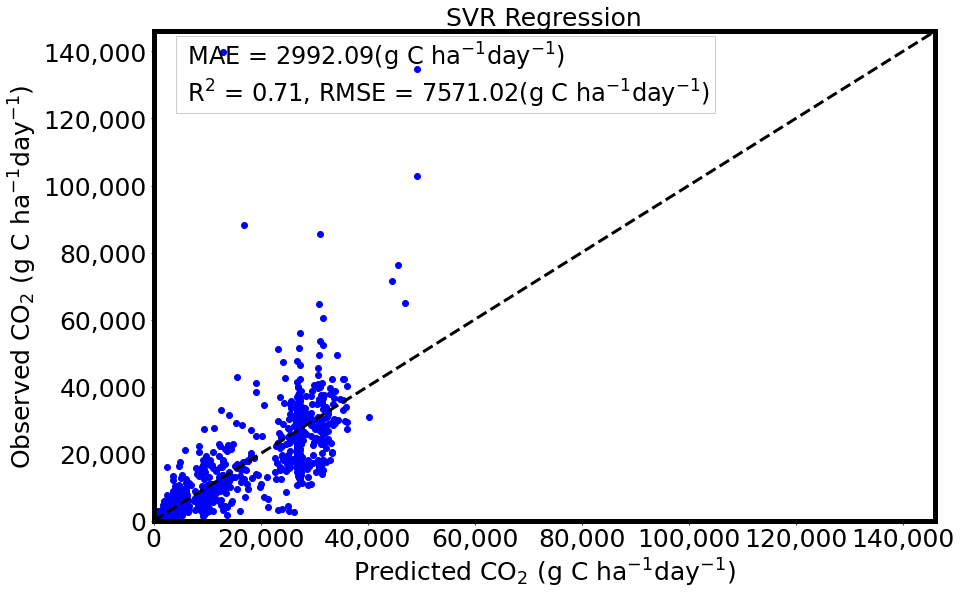

In [68]:
# Create Regression Plot for Test and Prediction values
import matplotlib.pyplot as plt 
from pylab import *

#Plot for multi linear regression
from scipy.optimize import curve_fit
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, y_pred_SVR, y_test, cv=10)

fig, ax = plt.subplots(figsize=(14, 9))
ax.set_title('SVR Regression', fontsize=25)
ax.scatter(predicted,y_test,c="blue")
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Predicted CO$_2$ (g C ha$^{-1}$day$^{-1}$)',fontsize=25)
ax.set_ylabel('Observed CO$_2$ (g C ha$^{-1}$day$^{-1}$)',fontsize=25)
plt.xlim(0, 146000)
plt.ylim(0, 146000)

ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.tick_params(axis='both', which='major', labelsize=25)
plt.text(5000,125000, Metric,fontsize=24, bbox=dict(facecolor='none', alpha=0.2))
rc('axes', linewidth=1)
plt.show()

### Gradient Boosting Regression

In [93]:
# Create Datasets for Target and Predictors
X = pd.DataFrame(np.c_[New_GHG_Data['Air_Temp_DEGC'],New_GHG_Data['Soil_Temp_DEGC'],New_GHG_Data['Soil_Classification'],New_GHG_Data['Crop'],New_GHG_Data['Fert_Ammend_Class']], columns = ['Air_Temp_DEGC','Soil_Temp_DEGC','Soil_Classification','Crop','Fert_Ammend_Class'])
y = New_GHG_Data['Carbon_dioxide'] # Create dataset with CO2 flux

In [94]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [95]:
#Split dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print("The shape of the X_trainset is",X_train.shape) # The shape of the X_trainset
print("The shape of the y_trainset is", y_train.shape) # The shape of the y_trainset

print("The shape of the X_testset is", X_test.shape) # The shape of the X_testset
print("The shape of the y_testset is", y_test.shape) # The shape of the y_testset

The shape of the X_trainset is (5504, 5)
The shape of the y_trainset is (5504,)
The shape of the X_testset is (2359, 5)
The shape of the y_testset is (2359,)


In [96]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [350]:
 GBR_params = {
    'n_estimators': [50,100,150,200],
    'learning_rate':[0.01,0.1,0.2, 0.3,1],
    'max_depth': [5,6,7,8,9,10],
    'loss': ['huber'],
    'alpha':[0.99]
}

In [ ]:
#Hyperparameter tuning using GridsearchCV
GBR = GradientBoostingRegressor(**GBR_params)
grid = GridSearchCV(GBR, GBR_params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train.ravel())
print(grid.best_params_)
print("MSE:"+ str(grid.best_score_))

In [103]:
GBR_params = {'n_estimators':50, 'max_depth': 10,
        'learning_rate': 0.1, 'loss': 'huber','alpha':0.99,'max_features':'sqrt','max_leaf_nodes':70}
GBR = GradientBoostingRegressor(**GBR_params)

In [104]:
#Fit model
GBR.fit(X_train, y_train.ravel())

GradientBoostingRegressor(alpha=0.99, loss='huber', max_depth=10,
                          max_features='sqrt', max_leaf_nodes=70,
                          n_estimators=50)

In [105]:
#Predict trainset
y_train_GBR = GBR.predict(X_train)

In [106]:
# Predicting the test set results
y_pred_GBR = GBR.predict(X_test)

In [108]:
#Metrics

#Gradient Boosting Regression


#Train set
score = r2_score(y_train, y_train_GBR)
print("Train accuracy (R2) for GBR: {}".format(score))

#Test set
score_R2_GBR = r2_score(y_test, y_pred_GBR)
print("Test accuracy (R2) for GBR: {}".format(score_R2_GBR))    
    

#Train set
score = mean_absolute_error(y_train, y_train_GBR)
print("Train accuracy (MAE) for GBR: {}".format(score))

#Test set
score_MAE_GBR = mean_absolute_error(y_test, y_pred_GBR)
print("Test accuracy (MAE) for GBR: {}".format(score_MAE_GBR))    

#Train set
score = np.sqrt(metrics.mean_squared_error(y_train, y_train_GBR))
print("Train accuracy (RMSE) for GBR: {}".format(score))

#Test set
score_RMSE_GBR =np.sqrt(metrics.mean_squared_error(y_test, y_pred_GBR))
print("Test accuracy (RMSE) for GBR: {}".format(score_RMSE_GBR))
    

Train accuracy (R2) for GBR: 0.8850371195884802
Test accuracy (R2) for GBR: 0.8161580277622793
Train accuracy (MAE) for GBR: 2177.892714902919
Test accuracy (MAE) for GBR: 2591.614600595626
Train accuracy (RMSE) for GBR: 4405.434812435706
Test accuracy (RMSE) for GBR: 5961.145384887715


In [109]:
Metric =  " MAE = " + str(round(score_MAE_GBR, 3))+"(g C ha$^{-1}$day$^{-1}$)" + "\n"+ " R$^2$ = " + str(round(score_R2_GBR, 2))+ "," + " RMSE = "+ str(round(score_RMSE_GBR, 3))+"(g C ha$^{-1}$day$^{-1}$)"
print("GBR Model Performance: ", Metric)

GBR Model Performance:   MAE = 2591.615(g C ha$^{-1}$day$^{-1}$)
 R$^2$ = 0.82, RMSE = 5961.145(g C ha$^{-1}$day$^{-1}$)


In [110]:
y_pred_GBR= y_pred_GBR.reshape(-1, 1)

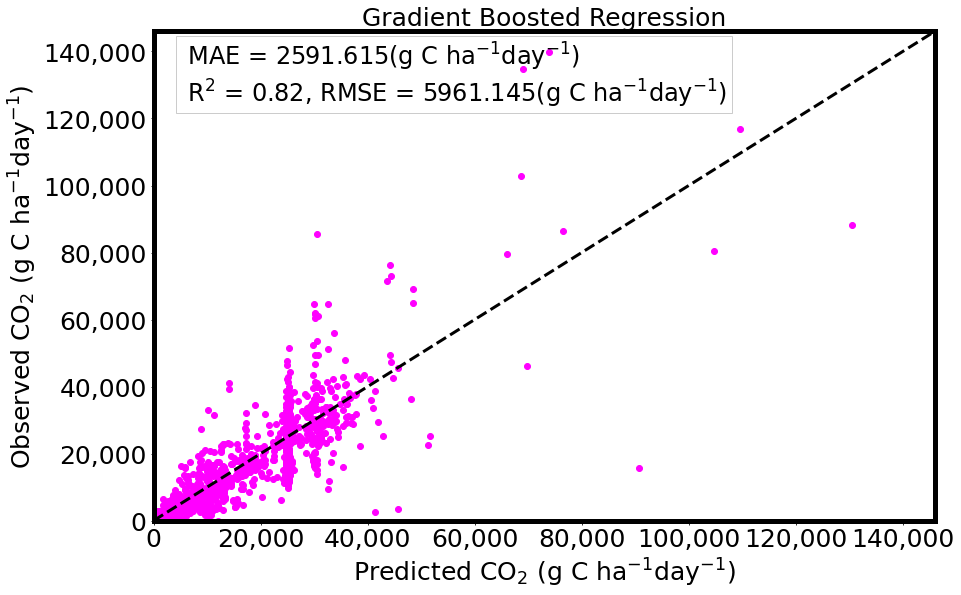

In [112]:
# Create Regression Plot for Test and Prediction values
import matplotlib.pyplot as plt 
from pylab import *

#Plot for multi linear regression
from scipy.optimize import curve_fit
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, y_pred_GBR, y_test, cv=10)

fig, ax = plt.subplots(figsize=(14, 9))
ax.set_title('Gradient Boosted Regression', fontsize=25)
ax.scatter(predicted,y_test,c="magenta")
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Predicted CO$_2$ (g C ha$^{-1}$day$^{-1}$)',fontsize=25)
ax.set_ylabel('Observed CO$_2$ (g C ha$^{-1}$day$^{-1}$)',fontsize=25)
plt.xlim(0, 146000)
plt.ylim(0, 146000)

ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.tick_params(axis='both', which='major', labelsize=25)
plt.text(5000,125000, Metric,fontsize=24, bbox=dict(facecolor='none', alpha=0.2))
rc('axes', linewidth=1)
plt.show()

### Feature Importance

In [304]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
#from pyplot import plt.

In [305]:
# Create Datasets for Target and Predictors
X = pd.DataFrame(np.c_[New_GHG_Data['Air_Temp_DEGC'],New_GHG_Data['Soil_Temp_DEGC'],New_GHG_Data['Soil_Classification'],New_GHG_Data['Crop'],New_GHG_Data['Fert_Ammend_Class']], columns = ['Air_Temp_DEGC','Soil_Temp_DEGC','Soil_Classification','Crop','Fert_Ammend_Class'])
y = New_GHG_Data['Carbon_dioxide'] 

In [306]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
print("The shape of the X_trainset is",X_train.shape) # The shape of the X_trainset
print("The shape of the y_trainset is", y_train.shape) # The shape of the y_trainset

print("The shape of the X_testset is", X_test.shape) # The shape of the X_testset
print("The shape of the y_testset is", y_test.shape) # The shape of the y_testset

The shape of the X_trainset is (6290, 5)
The shape of the y_trainset is (6290,)
The shape of the X_testset is (1573, 5)
The shape of the y_testset is (1573,)


In [307]:
GBR_params = {'n_estimators':50, 'max_depth': 10,
        'learning_rate': 0.1, 'loss': 'huber','alpha':0.99,'max_features':'sqrt','max_leaf_nodes':70}
GBR = GradientBoostingRegressor(**GBR_params)

In [308]:
GBR.fit(X_train, y_train.ravel())

GradientBoostingRegressor(alpha=0.99, loss='huber', max_depth=10,
                          max_features='sqrt', max_leaf_nodes=70,
                          n_estimators=50)

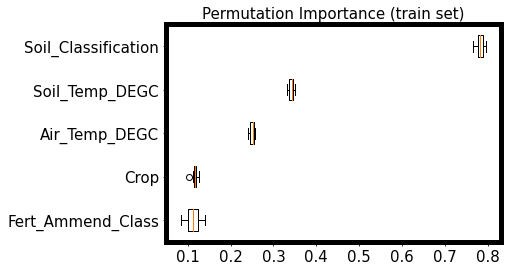

In [309]:
result = permutation_importance(GBR, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
#plt.subplot(1, 2, 1)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X.columns)[sorted_idx])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title("Permutation Importance (train set)",fontsize=15)
fig.tight_layout()
plt.show()


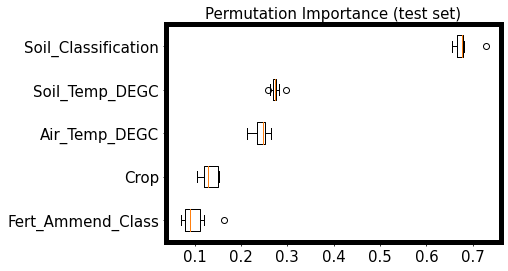

In [685]:
result = permutation_importance(GBR, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
#plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X.columns)[sorted_idx])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title("Permutation Importance (test set)",fontsize=15)
fig.tight_layout()
plt.show()